In [1]:
# importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tkinter as tk
from tkinter import filedialog
import pathlib
from keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPool2D, Flatten, Input, ZeroPadding2D, BatchNormalization
from keras.layers import Activation,MaxPooling2D, Add,AveragePooling2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam


In [2]:
# Fetching the dataset
data = 'Train'
data = pathlib.Path(data)

In [3]:
# Data preprocessing for Training Set
batch_size=32
height = 64
width = 64

train_data=tf.keras.utils.image_dataset_from_directory(
    data,
    batch_size=batch_size,
    seed=123,
    validation_split=0.2,
    subset="training",
    image_size=(height,width)
)

Found 10000 files belonging to 2 classes.
Using 8000 files for training.


In [4]:
# Data preprocessing for Validation Set
valid_data=tf.keras.utils.image_dataset_from_directory(
    data,
    batch_size=batch_size,
    seed=123,
    validation_split=0.2,
    subset="validation",
    image_size=(height,width)
)

Found 10000 files belonging to 2 classes.
Using 2000 files for validation.


In [5]:
# Sowing the classes in Train Set
train_label_name = train_data.class_names
print(train_label_name)

['WithMask', 'WithoutMask']


In [6]:
# Sowing the classes in Validation Set
valid_label_name = valid_data.class_names
print(valid_label_name)

['WithMask', 'WithoutMask']


In [7]:
# Automatically shuffling the images @ 1000 images per fetch
autotune=tf.data.experimental.AUTOTUNE
train_data=train_data.cache().shuffle(1000).prefetch(buffer_size=autotune)

valid_data=valid_data.cache().prefetch(buffer_size=autotune)

In [8]:
# building the vgg16 model
def Vgg16(input_shape=(64, 64, 3), classes = 2):

  input = Input(shape = (64,64,3))

  x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same' , activation = 'relu')(input)
  x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same' , activation = 'relu')(x)
  x = MaxPool2D(pool_size = (2,2))(x)

  x = Conv2D(filters = 128, kernel_size = (3,3), padding = 'same' , activation = 'relu')(x)
  x = Conv2D(filters = 128, kernel_size = (3,3), padding = 'same' , activation = 'relu')(x)
  x = MaxPool2D(pool_size = (2,2))(x)

  x = Conv2D(filters = 256, kernel_size = (3,3), padding = 'same' , activation = 'relu')(x)
  x = Conv2D(filters = 256, kernel_size = (3,3), padding = 'same' , activation = 'relu')(x)
  x = Conv2D(filters = 256, kernel_size = (3,3), padding = 'same' , activation = 'relu')(x)
  x = MaxPool2D(pool_size = (2,2))(x)

  x = Conv2D(filters = 512, kernel_size = (3,3), padding = 'same' , activation = 'relu')(x)
  x = Conv2D(filters = 512, kernel_size = (3,3), padding = 'same' , activation = 'relu')(x)
  x = Conv2D(filters = 512, kernel_size = (3,3), padding = 'same' , activation = 'relu')(x)
  x = MaxPool2D(pool_size = (2,2))(x)

  x = Conv2D(filters = 512, kernel_size = (3,3), padding = 'same' , activation = 'relu')(x)
  x = Conv2D(filters = 512, kernel_size = (3,3), padding = 'same' , activation = 'relu')(x)
  x = Conv2D(filters = 512, kernel_size = (3,3), padding = 'same' , activation = 'relu')(x)
  x = MaxPool2D(pool_size = (2,2))(x)

  x = Flatten()(x)
  x = Dense(units = 4096, activation = 'relu')(x)
  x = Dense(units = 4096, activation = 'relu')(x)
  x = Dense(units = 1, activation = 'softmax')(x)

  model = Model(inputs = input, outputs = x, name = 'Vgg16')

  return model

In [9]:
vgg_16_model = Vgg16(input_shape = (64,64,3), classes = 2)

In [10]:
vgg_16_model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
vgg_16_model.summary()

Model: "Vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       147584    
                                                             

In [12]:
# Total no. of iterations to be carried out during training
noepochs = 7

In [13]:
# Running the epochs on VGG16 model
mymodel = vgg_16_model.fit(train_data,validation_data=valid_data,epochs=noepochs)

Epoch 1/7
250/250 [==============================] - 1031s 4s/step - loss: 3.9861 - accuracy: 0.5013 - val_loss: 0.6935 - val_accuracy: 0.4950
Epoch 2/7
250/250 [==============================] - 957s 4s/step - loss: 0.6933 - accuracy: 0.5013 - val_loss: 0.6933 - val_accuracy: 0.4950
Epoch 3/7
250/250 [==============================] - 946s 4s/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 4/7
250/250 [==============================] - 973s 4s/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 5/7
250/250 [==============================] - 961s 4s/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 6/7
250/250 [==============================] - 939s 4s/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 7/7
250/250 [==============================] - 941s 4s/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.4950


In [21]:
epoch_range=range(noepochs)
acc=mymodel.history['accuracy']
val_acc = mymodel.history['val_accuracy']
loss=mymodel.history['loss']
val_loss=mymodel.history['val_loss']

Text(0.5, 1.0, 'Training and validation Accuracy')

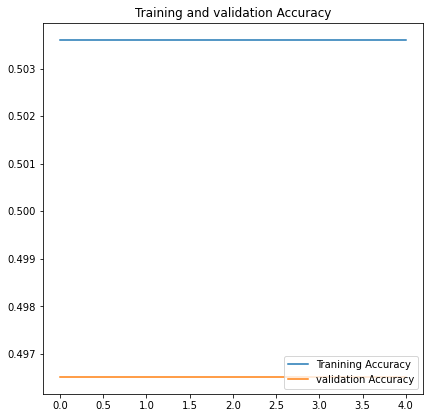

In [22]:
# Plotting the accuracy for training and validation sets
plt.figure(figsize=(15,15))
plt.subplot(2,2,2)
plt.plot(epoch_range,acc,label='Tranining Accuracy')
plt.plot(epoch_range,val_acc,label='validation Accuracy')
plt.legend(loc ="lower right")
plt.title("Training and validation Accuracy")

Text(0.5, 1.0, 'Training and validation loss')

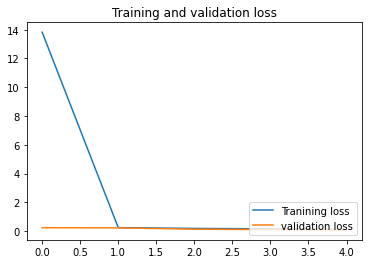

In [23]:
# plotting the loss for training and validation sets
plt.subplot(1,1,1)
plt.plot(epoch_range,loss,label='Tranining loss')
plt.plot(epoch_range,val_loss,label='validation loss')
plt.legend(loc ="lower right")
plt.title("Training and validation loss")

In [24]:
# Fetching the image to be tested using the trained model
image = cv2.imread("Face Mask Detection/Train/WithMask/10.png")

In [25]:
# resizing the image using opencv and storing it
image_resized = cv2.resize(image, (height, width))
image = np.expand_dims(image_resized, axis = 0)
print(image.shape)

(1, 64, 64, 3)


In [26]:
# making prediction on the given image
pred = vgg_16_model.predict(image)

In [27]:
predicted_class = train_label_name[np.argmax(pred)]
print("Predicted Class: ", predicted_class)

Predicted Class:  WithMask
